In [2]:
from a2_rFPP import rFPPSolution
from a3_solution_parser import fixPartitions, solJoint, actualRoutes, plotRoutes
from a1_clustering import makeClusters
from a1_FengE_instance import LOADDATA
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import AgglomerativeClustering

a = LOADDATA()

## Clustering Results with Different Threshold
- 1 min, 2 min, ..., 7 min

THRESHOLD -  60 | avg -  41 | min -   3 | 1-qt -  26 | 2-qt -  40 | 3-qt -  53 | max -  93
THRESHOLD - 120 | avg -  32 | min -   3 | 1-qt -  18 | 2-qt -  30 | 3-qt -  43 | max -  85
THRESHOLD - 180 | avg -  25 | min -   3 | 1-qt -  14 | 2-qt -  23 | 3-qt -  35 | max -  75
THRESHOLD - 240 | avg -  21 | min -   3 | 1-qt -  11 | 2-qt -  18 | 3-qt -  27 | max -  68
THRESHOLD - 300 | avg -  17 | min -   3 | 1-qt -   8 | 2-qt -  14 | 3-qt -  23 | max -  62
THRESHOLD - 360 | avg -  14 | min -   3 | 1-qt -   7 | 2-qt -  11 | 3-qt -  19 | max -  53
THRESHOLD - 420 | avg -  12 | min -   3 | 1-qt -   5 | 2-qt -  10 | 3-qt -  17 | max -  48


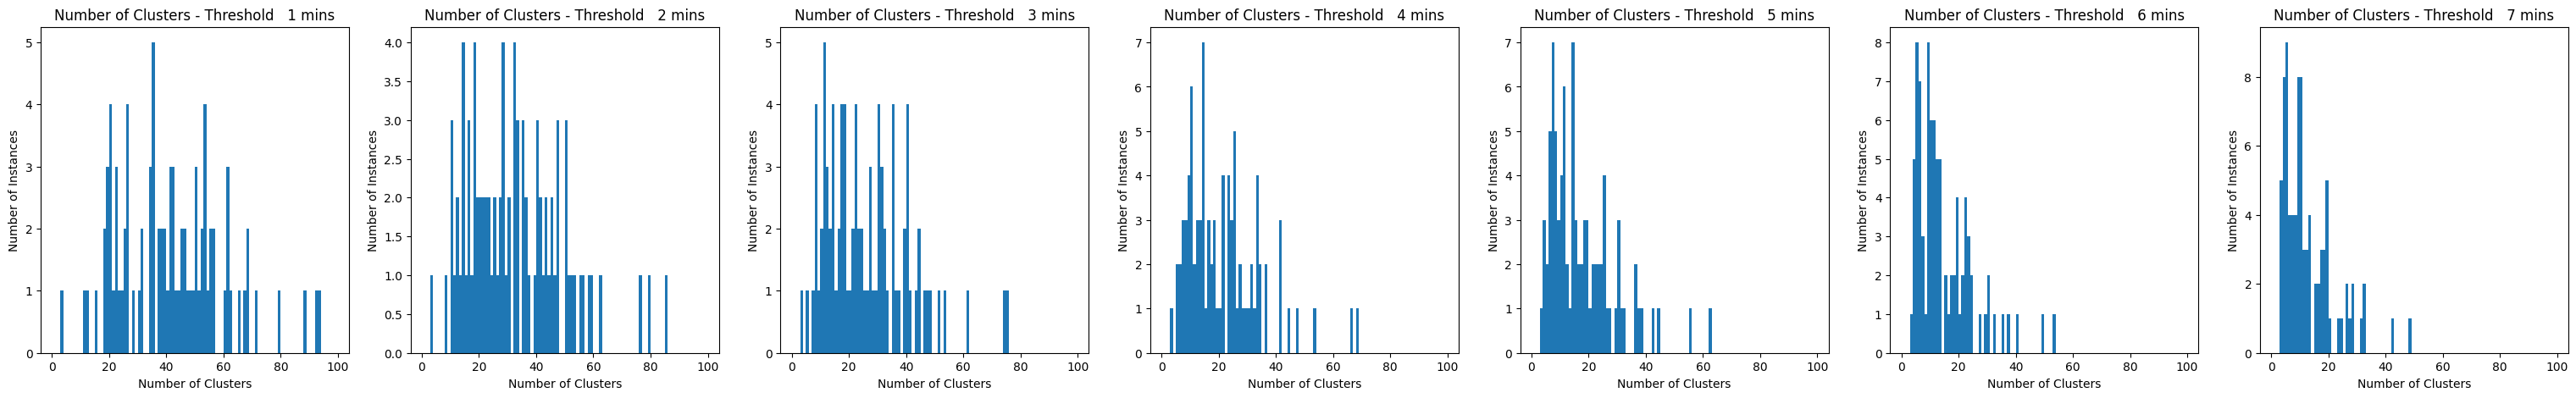

In [3]:
ts_list = [60, 120, 180, 240, 300, 360, 420]
fig, axes = plt.subplots(1, len(ts_list), figsize=(5.5*len(ts_list), 5))
for i_ts, ts in enumerate(ts_list):
    c_n_list = []
    for id in range(88):
        a_manager = a.getAManagerAndShelves(id)
        dist = a_manager["distance"]
        origin_nodes = len(dist)
        num_clusters, labels, clustering_dict_nodes, clustering_dict_labels = makeClusters(dist, ts, image=False)
        # print("id: {:>3d} | origin_nodes: {:>3d} | num_clusters: {:>3d}".format(id, origin_nodes, num_clusters))
        c_n_list.append(num_clusters)
    c_n_list = np.array(c_n_list)
    axes[i_ts].hist(c_n_list, bins=range(1, 100))
    axes[i_ts].set_title("Number of Clusters - Threshold {:>3d} mins".format(i_ts+1))
    axes[i_ts].set_xlabel("Number of Clusters")
    axes[i_ts].set_ylabel("Number of Instances")
    print("THRESHOLD - {:>3d} | avg - {:>3d} | min - {:>3d} | 1-qt - {:>3d} | 2-qt - {:>3d} | 3-qt - {:>3d} | max - {:>3d}".format(ts, int(np.mean(c_n_list)), int(np.min(c_n_list)), int(np.quantile(c_n_list, 0.25)), int(np.quantile(c_n_list, 0.5)), int(np.quantile(c_n_list, 0.75)), int(np.max(c_n_list))))
plt.show()

## Threshold = 5 min

id:   0 | origin_nodes:  62 | num_clusters:  14
id:   1 | origin_nodes:  82 | num_clusters:  11
id:   2 | origin_nodes: 121 | num_clusters:  55
id:   3 | origin_nodes:  78 | num_clusters:  11
id:   4 | origin_nodes:  61 | num_clusters:   6
id:   5 | origin_nodes:  89 | num_clusters:  12
id:   6 | origin_nodes: 134 | num_clusters:  29
id:   7 | origin_nodes: 116 | num_clusters:  19
id:   8 | origin_nodes:  65 | num_clusters:  11
id:   9 | origin_nodes:  81 | num_clusters:   4
id:  10 | origin_nodes:  77 | num_clusters:   9
id:  11 | origin_nodes:  91 | num_clusters:  21
id:  12 | origin_nodes: 110 | num_clusters:  18
id:  13 | origin_nodes: 101 | num_clusters:  27
id:  14 | origin_nodes: 101 | num_clusters:  17
id:  15 | origin_nodes: 117 | num_clusters:  24
id:  16 | origin_nodes:  73 | num_clusters:  16
id:  17 | origin_nodes:  92 | num_clusters:  12
id:  18 | origin_nodes:  82 | num_clusters:  31
id:  19 | origin_nodes:  96 | num_clusters:  19
id:  20 | origin_nodes:  81 | num_cluste

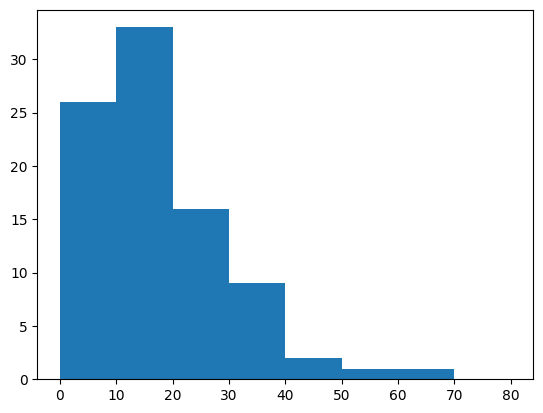

In [4]:
n_list = []
for id in range(88):
    a_manager = a.getAManagerAndShelves(id)
    dist = a_manager["distance"]
    origin_nodes = len(dist)
    num_clusters, labels, clustering_dict_nodes, clustering_dict_labels = makeClusters(dist, 300, image=False)
    print("id: {:>3d} | origin_nodes: {:>3d} | num_clusters: {:>3d}".format(id, origin_nodes, num_clusters))
    n_list.append(num_clusters)
n_list = np.array(n_list)
bins = np.arange(0, 90, 10)
plt.hist(n_list, bins=bins)
plt.show()

### Normal Instance
- id = 34

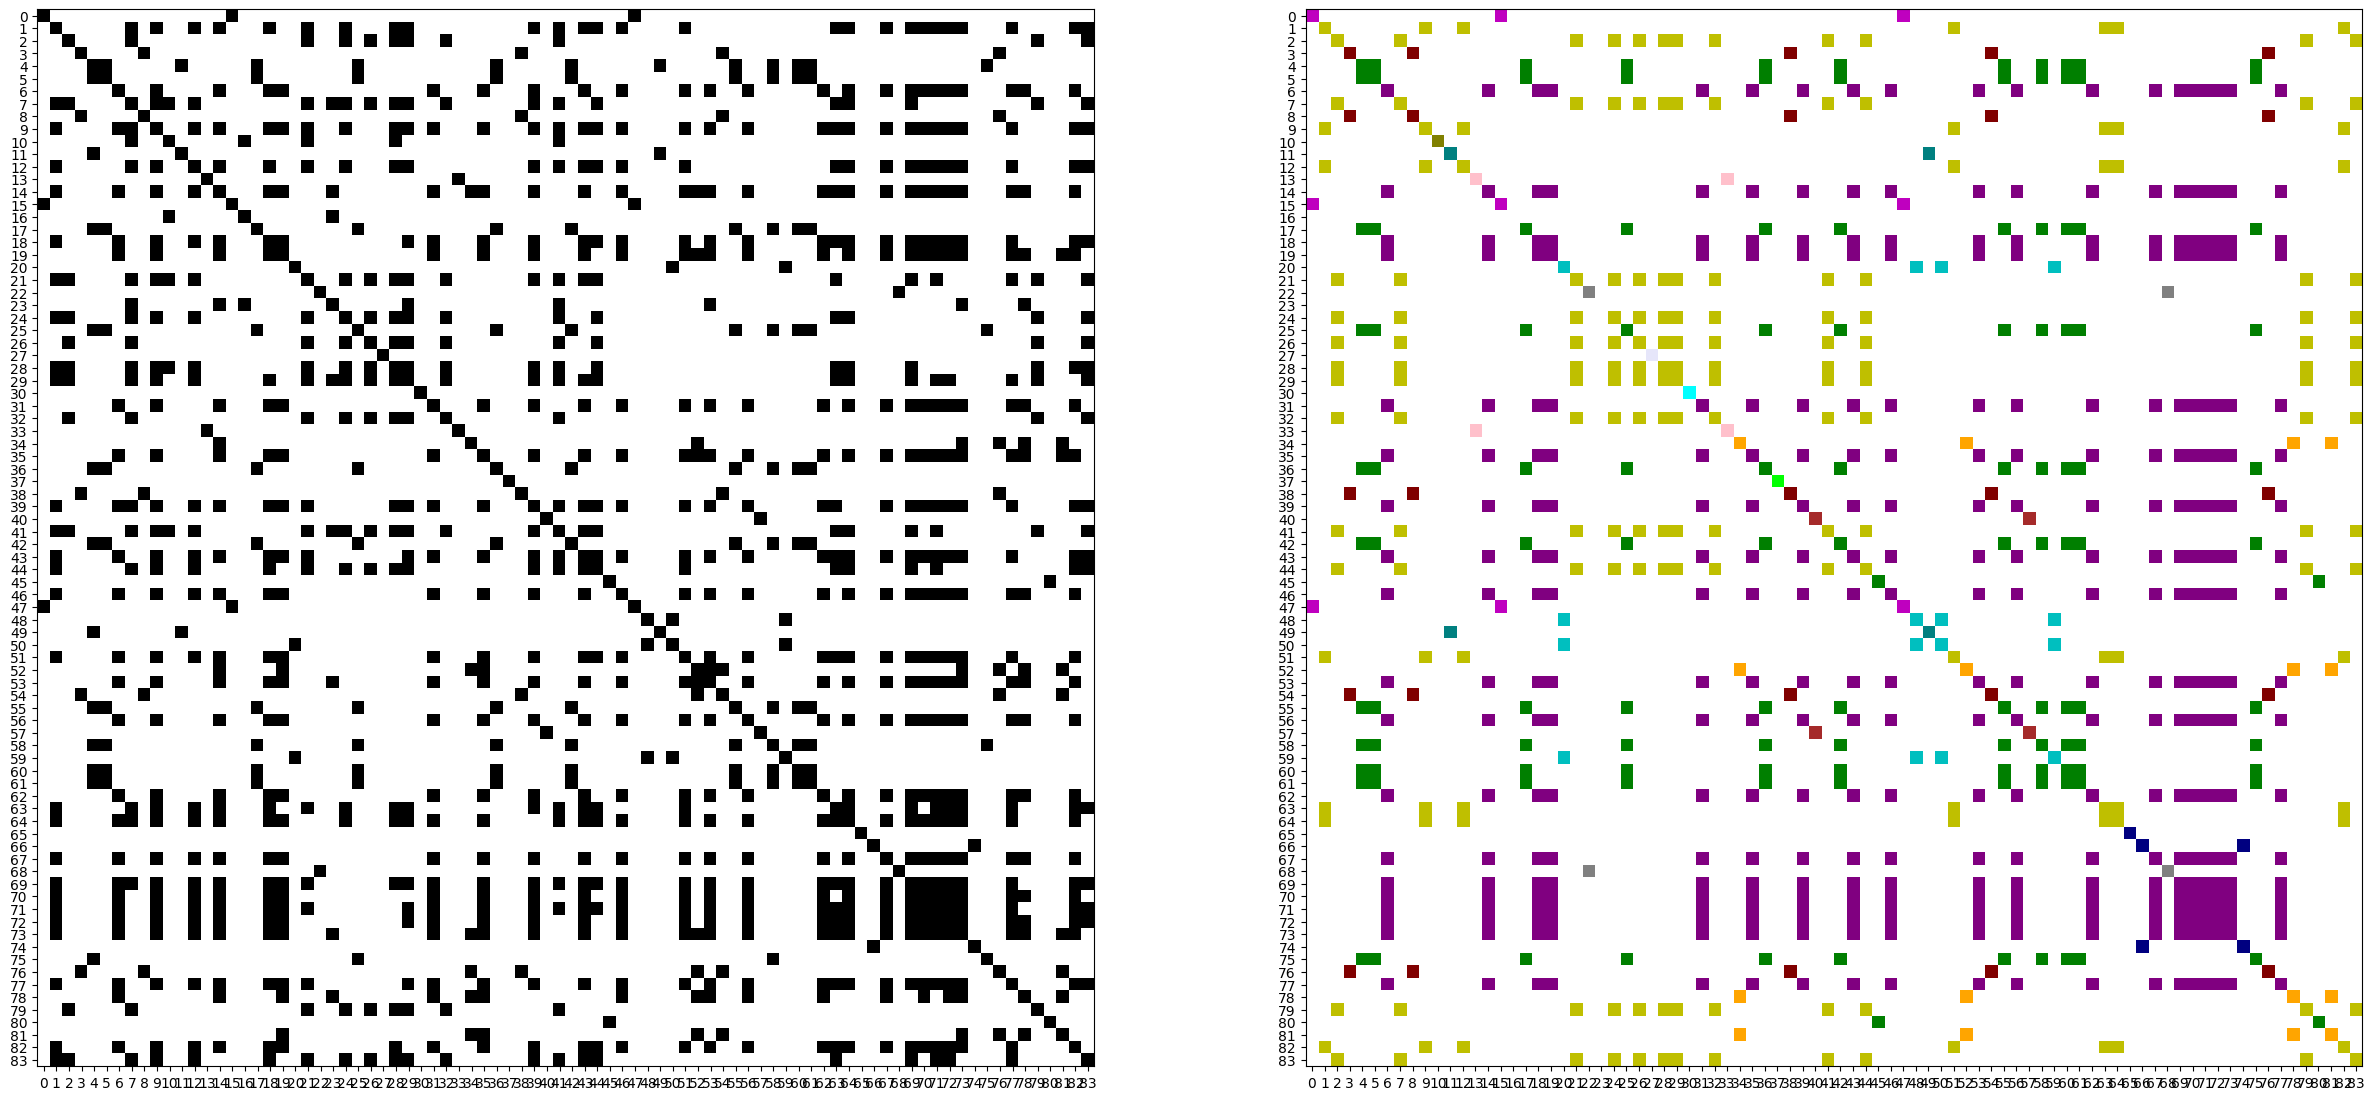

num_clusters:  20
labels: [ 3  4  5 17  1  1  8  5 17  4 12 15  4 10  8  3  6  1  8  8  2  5 11  6
  5  1  5 16  5  5 13  8  5 10  7  8  1 14 17  8  9  5  1  8  5  0  8  3
  2 15  2  4  7  8 17  1  8  9  1  2  1  1  8  4  4 19 18  8 11  8  8  8
  8  8 18  1 17  8  7  5  0  7  4  5]
clustering_dict_nodes: {0: 3, 1: 4, 2: 5, 3: 17, 4: 1, 5: 1, 6: 8, 7: 5, 8: 17, 9: 4, 10: 12, 11: 15, 12: 4, 13: 10, 14: 8, 15: 3, 16: 6, 17: 1, 18: 8, 19: 8, 20: 2, 21: 5, 22: 11, 23: 6, 24: 5, 25: 1, 26: 5, 27: 16, 28: 5, 29: 5, 30: 13, 31: 8, 32: 5, 33: 10, 34: 7, 35: 8, 36: 1, 37: 14, 38: 17, 39: 8, 40: 9, 41: 5, 42: 1, 43: 8, 44: 5, 45: 0, 46: 8, 47: 3, 48: 2, 49: 15, 50: 2, 51: 4, 52: 7, 53: 8, 54: 17, 55: 1, 56: 8, 57: 9, 58: 1, 59: 2, 60: 1, 61: 1, 62: 8, 63: 4, 64: 4, 65: 19, 66: 18, 67: 8, 68: 11, 69: 8, 70: 8, 71: 8, 72: 8, 73: 8, 74: 18, 75: 1, 76: 17, 77: 8, 78: 7, 79: 5, 80: 0, 81: 7, 82: 4, 83: 5}
clustering_dict_labels: {3: [0, 15, 47], 4: [1, 9, 12, 51, 63, 64, 82], 5: [2, 7, 21, 24, 26, 28,

In [11]:
a_manager = a.getAManagerAndShelves(34)
dist = a_manager["distance"]
num_clusters, labels, clustering_dict_nodes, clustering_dict_labels = makeClusters(dist, 300, image=True)
print("num_clusters: {:>3d}".format(num_clusters))
print("labels: {}".format(labels))
print("clustering_dict_nodes: {}".format(clustering_dict_nodes))
print("clustering_dict_labels: {}".format(clustering_dict_labels))
la = clustering_dict_labels[5]
for i in range(len(la)):
    for j in range(i+1, len(la)):
        print("i: {:>3d} | j: {:>3d} | dist: {:>3d}".format(la[i], la[j], int(dist[la[i]][la[j]])))

### Instance with maximal clusters
- id = 49

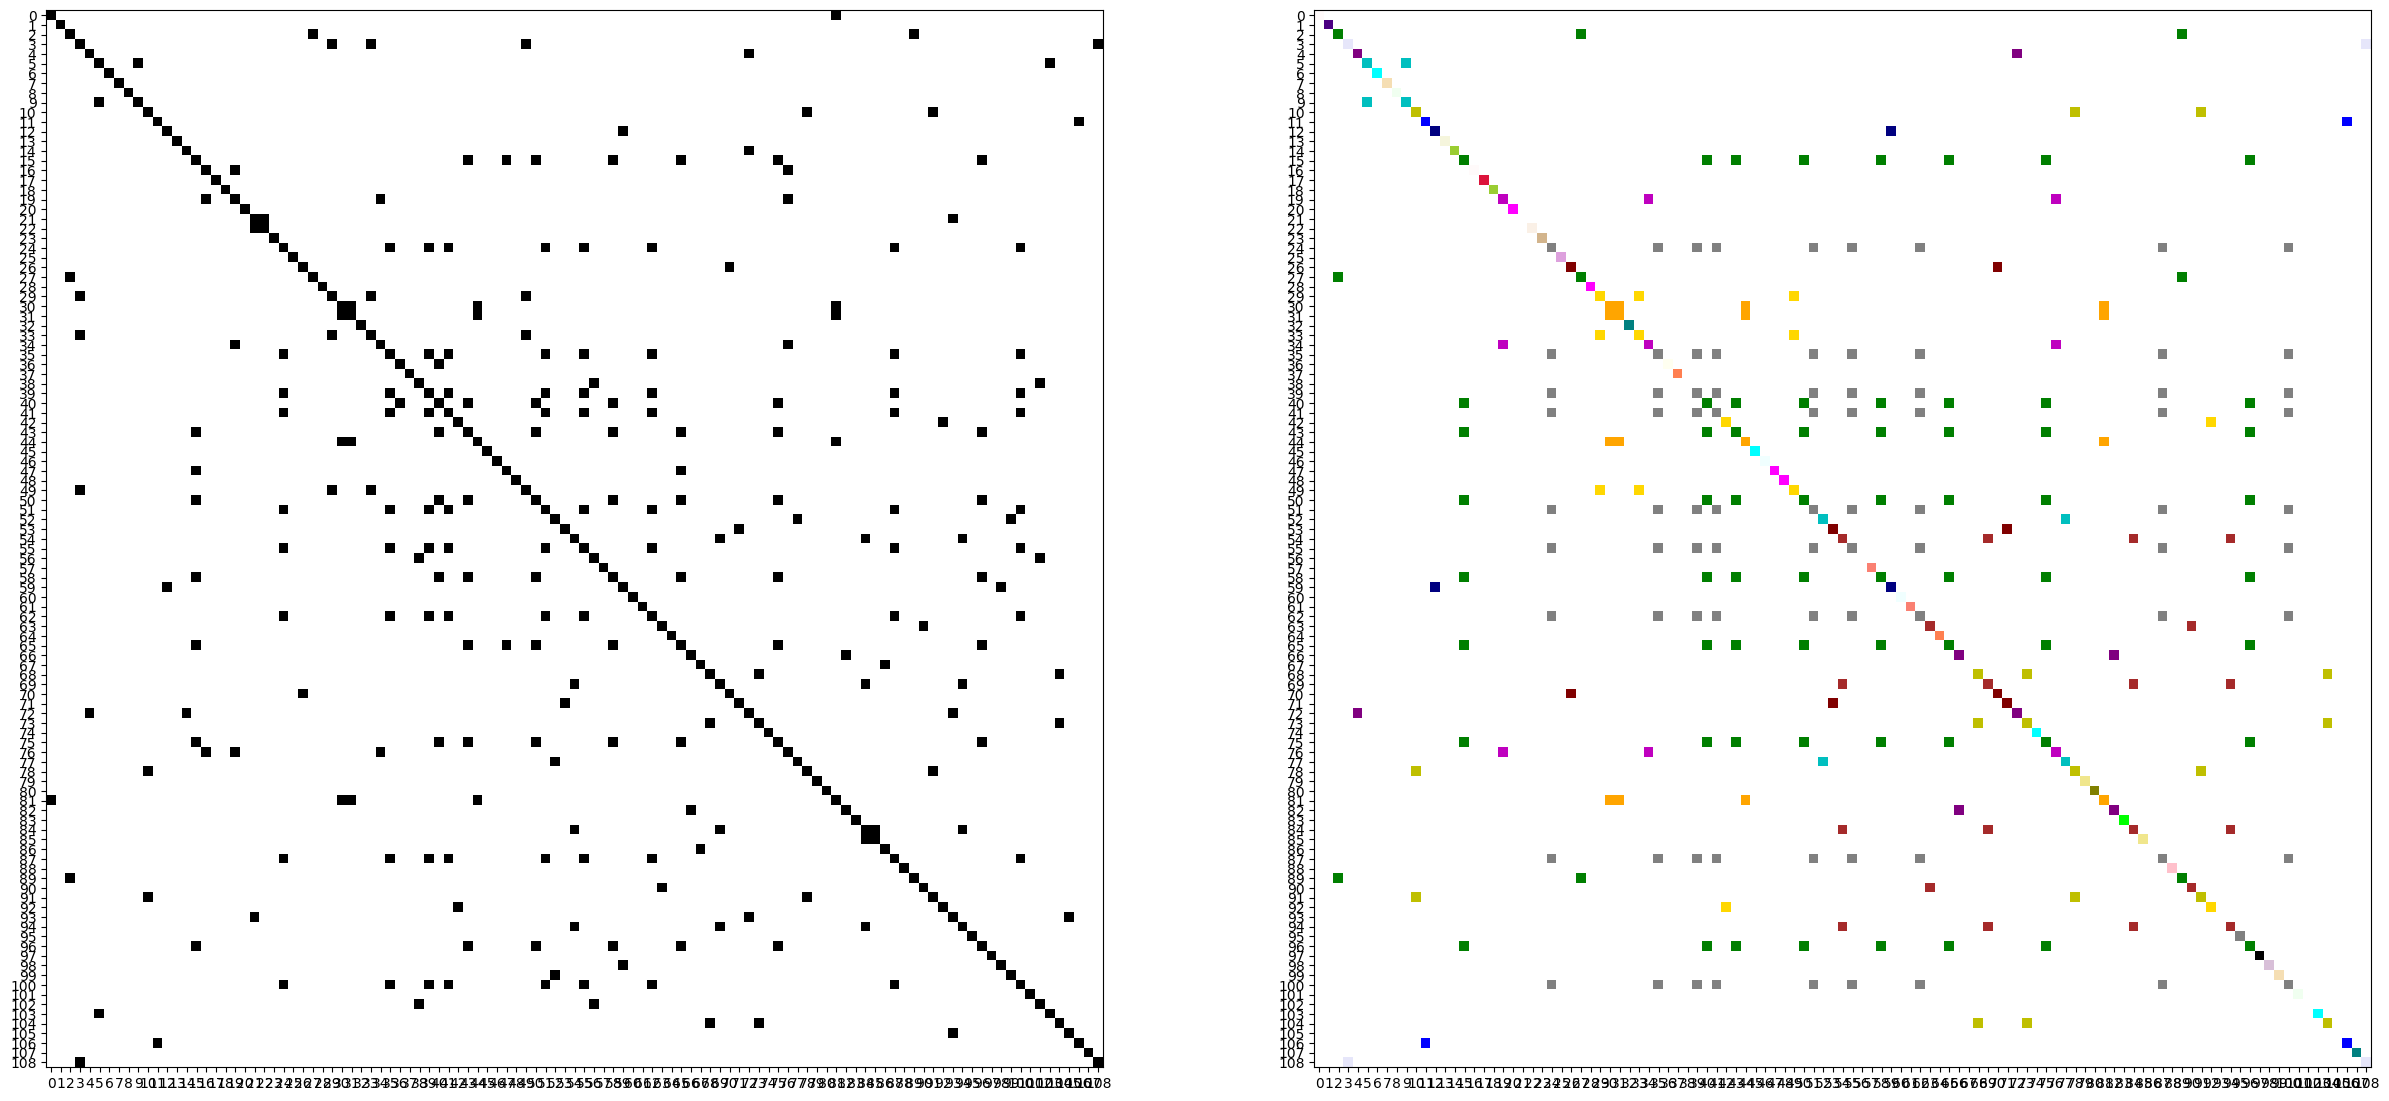

num_clusters:  62
labels: [55 37  1 26 13  5 35 58 47  5  8  3 29 40 60  2 56 43 61  6 44  0 51 34
 18 54 28  1 52 30 12 12 25 30  6 18 48 41 11 18  2 18 31  2 12 36 39 53
 45 30  2 18  4 27 15 18 11 33  2 29 38 32 18 16 42  2 14 10  7 15 28 27
 13  7 21  2  6  4  8 50 20 12 14 23 15 49 10 18 17  1 16  8 31  0 15 19
  2  9 57 59 18 46 11 22  7  0  3 24 26]
clustering_dict_nodes: {0: 55, 1: 37, 2: 1, 3: 26, 4: 13, 5: 5, 6: 35, 7: 58, 8: 47, 9: 5, 10: 8, 11: 3, 12: 29, 13: 40, 14: 60, 15: 2, 16: 56, 17: 43, 18: 61, 19: 6, 20: 44, 21: 0, 22: 51, 23: 34, 24: 18, 25: 54, 26: 28, 27: 1, 28: 52, 29: 30, 30: 12, 31: 12, 32: 25, 33: 30, 34: 6, 35: 18, 36: 48, 37: 41, 38: 11, 39: 18, 40: 2, 41: 18, 42: 31, 43: 2, 44: 12, 45: 36, 46: 39, 47: 53, 48: 45, 49: 30, 50: 2, 51: 18, 52: 4, 53: 27, 54: 15, 55: 18, 56: 11, 57: 33, 58: 2, 59: 29, 60: 38, 61: 32, 62: 18, 63: 16, 64: 42, 65: 2, 66: 14, 67: 10, 68: 7, 69: 15, 70: 28, 71: 27, 72: 13, 73: 7, 74: 21, 75: 2, 76: 6, 77: 4, 78: 8, 79: 50, 80: 20, 8

In [12]:
a_manager = a.getAManagerAndShelves(49)
dist = a_manager["distance"]
num_clusters, labels, clustering_dict_nodes, clustering_dict_labels = makeClusters(dist, 300, image=True)
print("num_clusters: {:>3d}".format(num_clusters))
print("labels: {}".format(labels))
print("clustering_dict_nodes: {}".format(clustering_dict_nodes))
print("clustering_dict_labels: {}".format(clustering_dict_labels))
la = clustering_dict_labels[18]
for i in range(len(la)):
    for j in range(i+1, len(la)):
        print("i: {:>3d} | j: {:>3d} | dist: {:>3d}".format(la[i], la[j], int(dist[la[i]][la[j]])))

In [13]:
for i in range(len(dist)):
    for j in range(i+1, len(dist)):
        print("i: {:>3d} | j: {:>3d} | dist: {:>3d}".format(i, j, int(dist[i][j])))

i:   0 | j:   1 | dist: 4247
i:   0 | j:   2 | dist: 2945
i:   0 | j:   3 | dist: 2690
i:   0 | j:   4 | dist: 3312
i:   0 | j:   5 | dist: 1684
i:   0 | j:   6 | dist: 3490
i:   0 | j:   7 | dist: 4986
i:   0 | j:   8 | dist: 2204
i:   0 | j:   9 | dist: 1529
i:   0 | j:  10 | dist: 4228
i:   0 | j:  11 | dist: 2679
i:   0 | j:  12 | dist: 4504
i:   0 | j:  13 | dist: 2528
i:   0 | j:  14 | dist: 3364
i:   0 | j:  15 | dist: 2026
i:   0 | j:  16 | dist: 5042
i:   0 | j:  17 | dist: 4747
i:   0 | j:  18 | dist: 3771
i:   0 | j:  19 | dist: 5100
i:   0 | j:  20 | dist: 4414
i:   0 | j:  21 | dist: 2840
i:   0 | j:  22 | dist: 2778
i:   0 | j:  23 | dist: 2136
i:   0 | j:  24 | dist: 4954
i:   0 | j:  25 | dist: 1953
i:   0 | j:  26 | dist: 2661
i:   0 | j:  27 | dist: 3227
i:   0 | j:  28 | dist: 2576
i:   0 | j:  29 | dist: 2540
i:   0 | j:  30 | dist: 345
i:   0 | j:  31 | dist: 345
i:   0 | j:  32 | dist: 3424
i:   0 | j:  33 | dist: 2500
i:   0 | j:  34 | dist: 5250
i:   0 | j:  35 

### Instance with minimal clusters
- id - 43

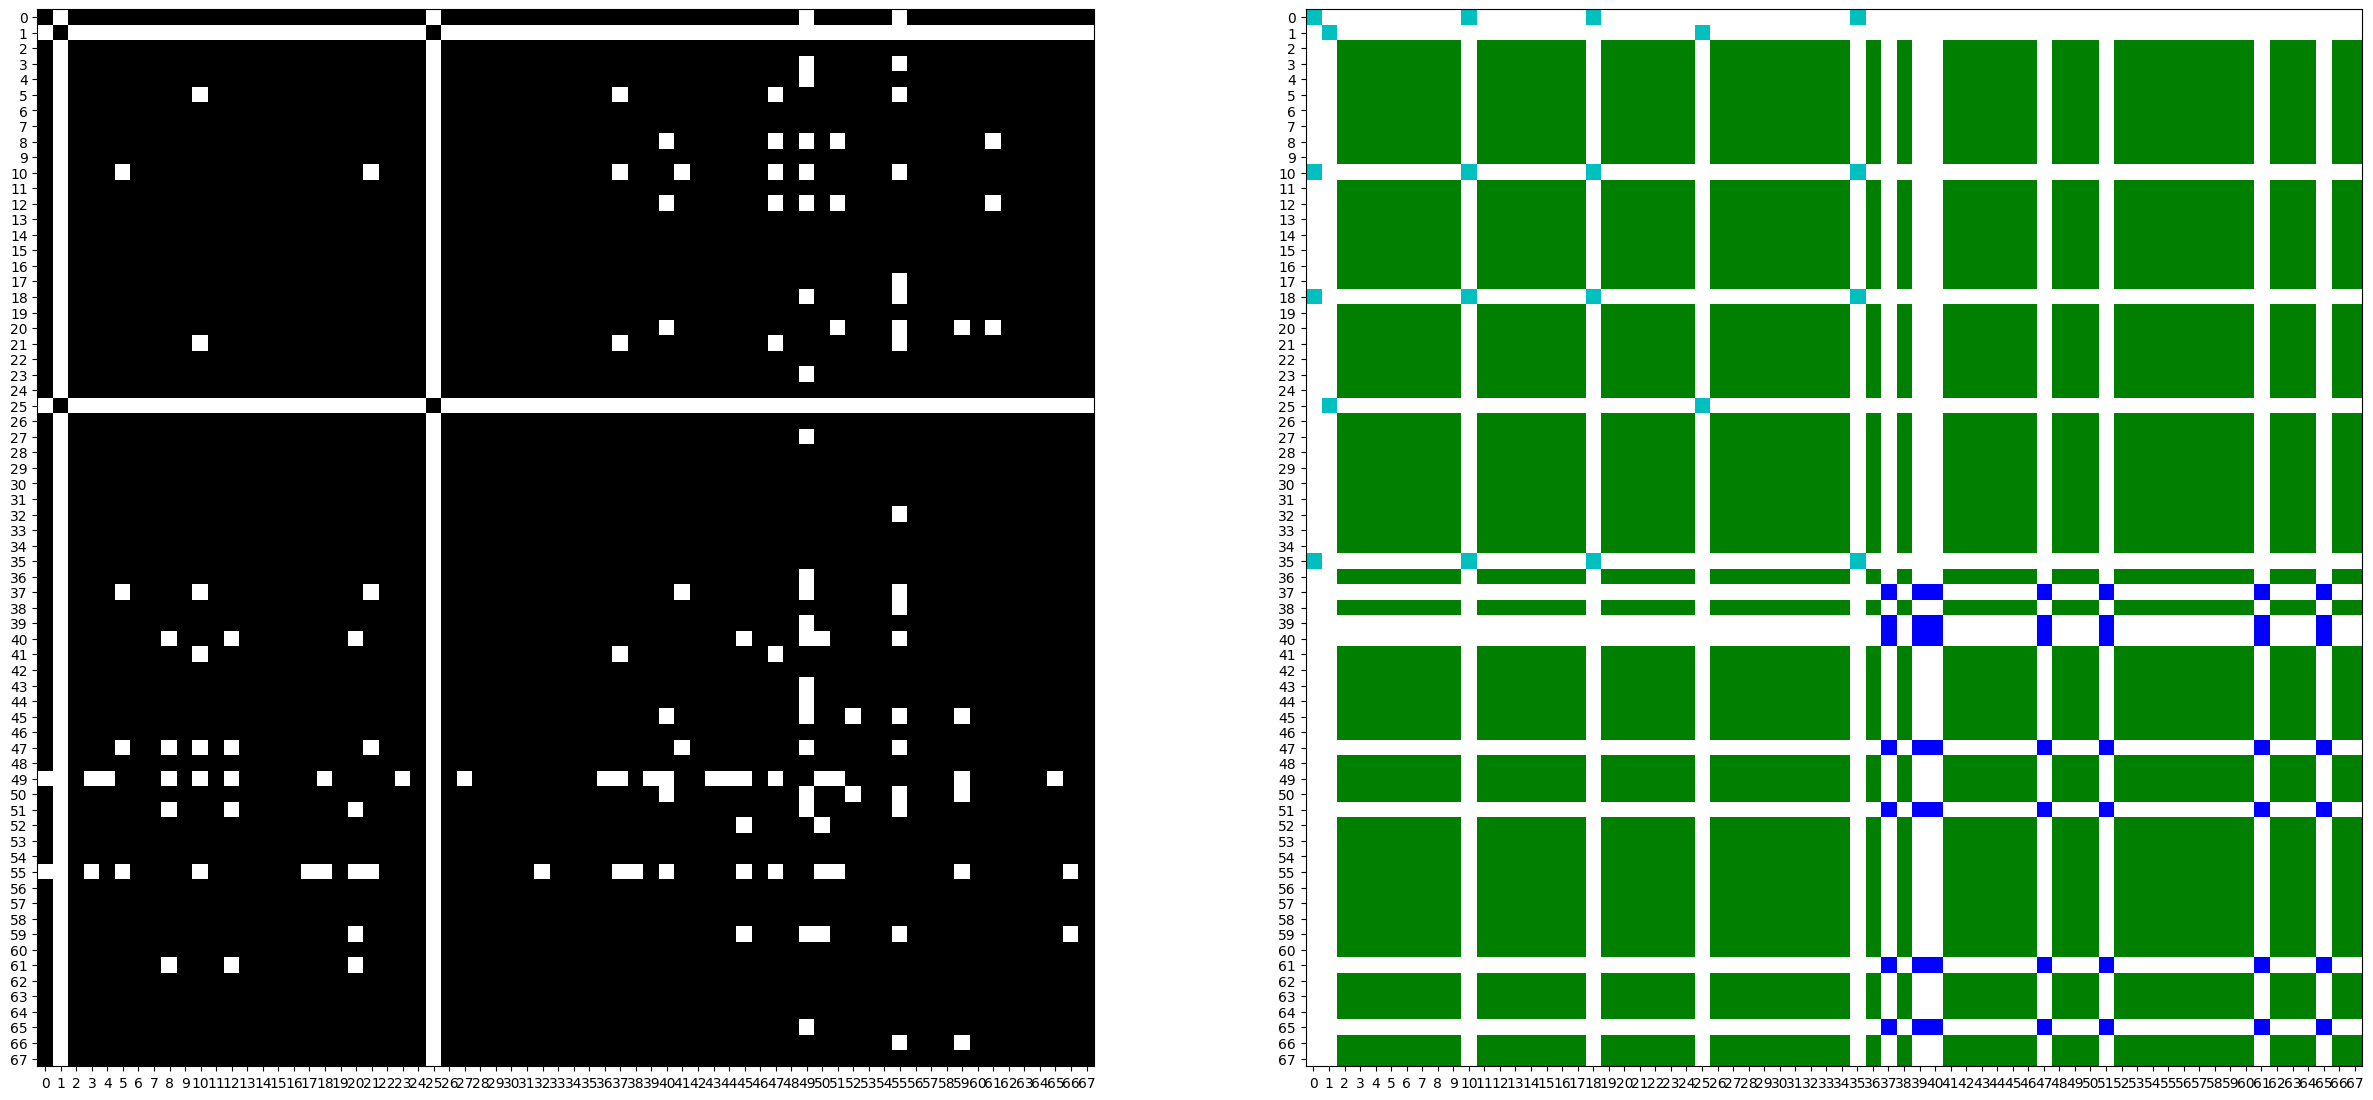

num_clusters:   4
labels: [2 3 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 2 0
 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
clustering_dict_nodes: {0: 2, 1: 3, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 2, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 2, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 3, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 2, 36: 0, 37: 1, 38: 0, 39: 1, 40: 1, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 1, 48: 0, 49: 0, 50: 0, 51: 1, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 1, 62: 0, 63: 0, 64: 0, 65: 1, 66: 0, 67: 0}
clustering_dict_labels: {2: [0, 10, 18, 35], 3: [1, 25], 0: [2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 38, 41, 42, 43, 44, 45, 46, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 66, 67], 1: [37, 39, 40, 47, 51, 61, 65]}
i:   2 | j:   3 | dist:  43
i:   2 | j

In [14]:
a_manager = a.getAManagerAndShelves(43)
dist = a_manager["distance"]
num_clusters, labels, clustering_dict_nodes, clustering_dict_labels = makeClusters(dist, 300, image=True)
print("num_clusters: {:>3d}".format(num_clusters))
print("labels: {}".format(labels))
print("clustering_dict_nodes: {}".format(clustering_dict_nodes))
print("clustering_dict_labels: {}".format(clustering_dict_labels))
la = clustering_dict_labels[0]
for i in range(len(la)):
    for j in range(i+1, len(la)):
        print("i: {:>3d} | j: {:>3d} | dist: {:>3d}".format(la[i], la[j], int(dist[la[i]][la[j]])))

In [15]:
for i in range(len(dist)):
    for j in range(i+1, len(dist)):
        print("i: {:>3d} | j: {:>3d} | dist: {:>3d}".format(i, j, int(dist[i][j])))

i:   0 | j:   1 | dist: 666
i:   0 | j:   2 | dist: 137
i:   0 | j:   3 | dist: 147
i:   0 | j:   4 | dist: 235
i:   0 | j:   5 | dist:  88
i:   0 | j:   6 | dist: 235
i:   0 | j:   7 | dist: 126
i:   0 | j:   8 | dist: 265
i:   0 | j:   9 | dist: 234
i:   0 | j:  10 | dist:  88
i:   0 | j:  11 | dist: 126
i:   0 | j:  12 | dist: 265
i:   0 | j:  13 | dist: 234
i:   0 | j:  14 | dist: 126
i:   0 | j:  15 | dist: 234
i:   0 | j:  16 | dist: 126
i:   0 | j:  17 | dist: 147
i:   0 | j:  18 | dist: 169
i:   0 | j:  19 | dist: 234
i:   0 | j:  20 | dist: 200
i:   0 | j:  21 | dist:  89
i:   0 | j:  22 | dist: 234
i:   0 | j:  23 | dist: 126
i:   0 | j:  24 | dist: 234
i:   0 | j:  25 | dist: 666
i:   0 | j:  26 | dist: 126
i:   0 | j:  27 | dist: 235
i:   0 | j:  28 | dist: 126
i:   0 | j:  29 | dist: 126
i:   0 | j:  30 | dist: 126
i:   0 | j:  31 | dist: 235
i:   0 | j:  32 | dist: 103
i:   0 | j:  33 | dist: 235
i:   0 | j:  34 | dist: 126
i:   0 | j:  35 | dist:  31
i:   0 | j:  36 | di